In [15]:
import time
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import AllChem

sns.set_theme(style="white")

In [6]:
!conda env list 
!conda activate master-thesis-log

# conda environments:
#
base                     /users/cwoest/Applications/anaconda3
gdsctools_env            /users/cwoest/Applications/anaconda3/envs/gdsctools_env
master-thesis-log     *  /users/cwoest/Applications/anaconda3/envs/master-thesis-log
r-env                    /users/cwoest/Applications/anaconda3/envs/r-env


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




Run the following if `rdkit` is not installed.
```bash
    !conda install -c rdkit rdkit
```

In [3]:
!pwd
!find ../../datasets/gdsc -name '*smiles*.csv' -ls

/Users/cwoest/Documents/Academics/Data_Science_UP/master_thesis/material/GNN-material
37474177       88 -rw-r--r--    1 cwoest           staff               41866 Apr 28 16:31 ../../datasets/gdsc/GDSC_compounds_inchi_key_with_smiles.csv


__Background__: 
  Conventionally, molecular fingerprints (numerical representations of molecules) are calculated through rule-based algorithms that map molecules to a sparse discrete space.
However, these algorithms perform poorly for shallow prediction models or small datasets. To address this issue, we present SMILES Transformer. Inspired by Transformer and pre-trained language models from natural language processing, SMILES Transformer learns molecular fingerprints through unsupervised pre-training of the sequence-to-sequence language model using a huge corpus of SMILES, a text representation system for molecules.

__Conclusion__: 
- fingerprint = numerical representation of molecules (via SMILES)
- https://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints

In [4]:
# Get GDSC base data.
PATH_TO_SAVE_DATA_TO = '../../datasets/gdsc/my_datasets/'
gdsc_base = pd.read_pickle(f'{PATH_TO_SAVE_DATA_TO}gdsc_base.pkl')
print(gdsc_base.shape)
gdsc_base.head(3)

(446521, 14)


,DRUG_ID,CELL_LINE_NAME,AUC,CELL_ID,LN_IC50,CONC,MASTER_CELL_ID,INTENSITY,DATASET,Z_SCORE,DRUG_NAME,RMSE,COSMIC_ID,POSITION
0,1,MC-CAR,0.982114,3137,2.395685,2.0,49,544404,GDSC1,-0.189576,Erlotinib,0.022521,683665,14
9,1,ES3,0.984816,2366,3.140923,2.0,1342,404197,GDSC1,0.508635,Erlotinib,0.031840,684055,14
27,1,ES5,0.985693,2368,3.968757,2.0,610,797378,GDSC1,1.284229,Erlotinib,0.026052,684057,14


In [5]:
uniq_drug_names = np.unique(gdsc_base.DRUG_NAME)
print(f"""
    There are {len(uniq_drug_names)} different DRUG_NAME's in the GDSC base table.
""")


    There are 449 different DRUG_NAME's in the GDSC base table.



The wanted dataset lies in here and the used code is taken from [this repository](https://github.com/PascalIversen/GDSC_utils/blob/main/GDSC_utils.py#L50-L105).

In [6]:
PATH_TO_GDSC_DATA = '../../datasets/gdsc/'
SMILES_FILE = 'GDSC_compounds_inchi_key_with_smiles.csv'

start = time.time()
smiles_data = pd.read_csv(f'{PATH_TO_GDSC_DATA}{SMILES_FILE}', sep=",", header=0)
print(f"File `{SMILES_FILE}` took {time.time()-start:.5f} seconds to import. \nShape: {smiles_data.shape}")
smiles_data.head(3)

File `GDSC_compounds_inchi_key_with_smiles.csv` took 0.00821 seconds to import. 
Shape: (425, 4)


,Unnamed: 0,drug_name,inchi_key,smiles
0,0,(5Z)-7-Oxozeaenol,NEQZWEXWOFPKOT-BYRRXHGESA-N,C[C@H]1CC=CC(=O)[C@H]([C@H](CC=Cc2cc(cc(c2C(=O...
1,1,5-Fluorouracil,GHASVSINZRGABV-UHFFFAOYSA-N,c1c(c(nc(n1)O)O)F
2,2,A-443654,YWTBGJGMTBHQTM-IBGZPJMESA-N,Cc1c2cc(ccc2n[nH]1)c1cc(cnc1)OC[C@H](Cc1c[nH]c...


### Create De Morgan Fingerprints

In [34]:
# TODO: This can be varied as a hyper-parameter.
N_BITS = 256

In [9]:
from external.gdsc_utils.GDSC_utils import get_demorgen_fingerprints

# Returns a list of fingerprints or nans.
fps = get_demorgen_fingerprints(drugs            = uniq_drug_names,
                                n_bits           = N_BITS,
                                path_drug_smiles = f'{PATH_TO_GDSC_DATA}{SMILES_FILE}')

print(fps[0].shape)
fps[0]

(256,)


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [10]:
print(f"""
    Each fingerprint has a shape of {fps[0].shape}.
    There are {len(uniq_drug_names)} unique DRUG_NAME's in the GDSC table. Each will get a fingerprint.
    {len([fp for fp in fps if fp is None])} ({100*len([fp for fp in fps if fp is None])/len(fps):2.2f}%) out of {len(fps)} fingerprints are None.
        - Thus, they didn't get a fingerprint.
        - They are None if the fingerprint is inaccessible.
""")


    Each fingerprint has a shape of (256,).
    There are 449 unique DRUG_NAME's in the GDSC table. Each will get a fingerprint.
    82 (18.26%) out of 449 fingerprints are None.
        - Thus, they didn't get a fingerprint.
        - They are None if the fingerprint is inaccessible.



In [11]:
# Append the fingerprints to the corresponding drug names. 
drug_name_fps = {uniq_drug_name: fps[i] for i, uniq_drug_name in enumerate(uniq_drug_names)}
assert len(uniq_drug_names) == len(uniq_drug_names) == len(fps)

This would correspond to a $449 \times 256$ matrix. Each row containing a fingerprint for a drug.

Now the dictionary `drug_name_fps` consists of the following:
- _Keys_: `DRUG_NAME`'s
- _Values_: corresponding SMILE fingerprints

In [67]:
# Save the DRUG_NAME - fingerprint dictionary to a file.
with open(f'{PATH_TO_SAVE_DATA_TO}drug_name_fingerprints.pkl', 'wb') as f:
    pickle.dump(drug_name_fps, f)

In [16]:
# Test if the read works.
with open(f'{PATH_TO_SAVE_DATA_TO}drug_name_fingerprints.pkl', 'rb') as f:
    loaded_drug_name_fps = pickle.load(f)

assert loaded_drug_name_fps.keys() == drug_name_fps.keys()
#assert np.array_equal(loaded_drug_name_fps.values(), drug_name_fps.values())

### Transform To DataFrame

In [ ]:
# Take only the drugs which have a fingerprint.
drug_name_fps_v2 = {drug: fp for drug, fp in drug_name_fps.items() if fp is not None}
print(f"There are {len(drug_name_fps_v2.keys())} drug with a non None fingerprint.")

There are 367 drug with a non None fingerprint.


In [ ]:
for i, (drug_name, fp) in enumerate(drug_name_fps_v2.items()):
    print(f"Drug name: {drug_name}")
    print(drug_name_fps_v2[drug_name])
    if i > 0: 
        break

Drug name: (5Z)-7-Oxozeaenol
[1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
Drug name: 5-Fluorouracil
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
drug_name_fps_df = pd.DataFrame.from_dict(drug_name_fps_v2, orient='index').rename_axis('drug_name').reset_index()
print(f"Shape: {drug_name_fps_df.shape}")
drug_name_fps_df.head(5)

Shape: (367, 257)


,drug_name,0,1,2,3,4,5,6,7,8,...,246,247,248,249,250,251,252,253,254,255
0,(5Z)-7-Oxozeaenol,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,5-Fluorouracil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A-443654,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,A-770041,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,A-83-01,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
# Save dataframe.
with open(f'{PATH_TO_SAVE_DATA_TO}drug_name_fingerprints_dataframe.pkl', 'wb') as f:
    pickle.dump(drug_name_fps_df, f)

- 1st column: unique drug name which has a non None fingerprint
- Rows: fingerprints per drug-name
- Columns: drug name + column for each of the 256 bits of the fingerprint
- Final Shape: (367, 257)

---

# Ideas For Molecular Encoders

Which molecular encoders can be used to represent drugs via molecules? 

- [Uniform graph convolutional network (UGCN)](https://watermark.silverchair.com/btaa822.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAvUwggLxBgkqhkiG9w0BBwagggLiMIIC3gIBADCCAtcGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMhe8Xk6GEgEcX0QaGAgEQgIICqLK3TSZXgAet8ktRILuaRtU-o4b_3Y1WUmbEvuZVvvTNSz9KR7FC5NUjAUJo8XJH0EOzYXj1ZgARvTOY32fWr3yLDUBpH1moa0EVAy2gLDXMz1mIJpXmNmn156RxSWR6wmTGVQUvHKT2_k8K-cj1hetzTpUKLWlAlCZz9t-EYOiEYkJhRiYr7ob7IOOM9HpR-ba4-mwc-zNpBY1Wd1tgXk6CTHyv1SyCErZELB6wQKn9e-NbAPgda8Lxk82EVn6GPi5dKc2cSKUAAa052dF_hso3ys8JFxHUZEbyOJuzjEje7xNFf-mAyUJ-GJLapWRdj2VK9JMr4ec8KMLdtuMeeVYC9b4MkPEhny20Z7ym7MO11Yg-zl-A8HZkxx9V-CW7G1O43R1JNYJfiChDa6tmoYnvl05opceZF_0dBE7DZzG4PKM5tjhZOds2o2DE6iK8HShvZmZ4NR50V5i_1NQtz5zv4A_IJIQtnmjy2e6BJZSlMI_2WhPkorz6Gn_ZmCfFVzgzxF4bpE3qWIB1ybpw2OzCOtrXwBsaYcY9_5h_ATBw1Ttk0lalBJRFEf31R-UyNLFm1G8iist5vi2-a8JwwXrmFvhKfbe9nkI3dR_NyLjXbEumlbaRq_NcmJCAbRSKhR7MbfCdWOVcKtHKubhOP2vX-IUQYOtZBZF7c67Gg4T5N7hUvDvrs2XIvG4EhJBA1frhiGxhp81fSxt7A-XseCToHLS7mfqGWU5YoBhkd3ECJSvRRqJ-rp8cVGb5xw1UnQI6FBpHQlWx59jy1tBiHiXH-KYjtNn7jWkFBW9o6DaRUHe8Vm7MOydFUK2MLtglVVW2ascdzKXo32qdYfG_hI9WxipUDrVq1CnqrD8N5gOMdKEGmzfcXwGENLUjjQvHCvdi1R7uswvn) 
  - for drug representation based on the chemical structure of drugs
  - for novel feature extreaction of drugs
  - can automatically capture drug structures by considering the interactions among atoms within a compound
- [SMILES](https://de.wikipedia.org/wiki/Simplified_Molecular_Input_Line_Entry_Specification) 
  - string-based features
- [molecular fingerprints](https://towardsdatascience.com/a-practical-introduction-to-the-use-of-molecular-fingerprints-in-drug-discovery-7f15021be2b1)
  - hand-crafted features

---

## Other Approaches Of Drug Representation

<class 'rdkit.Chem.rdchem.Mol'>


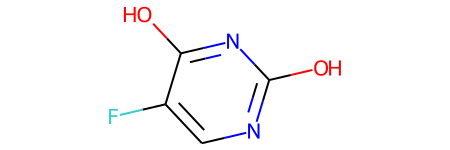

In [ ]:
from rdkit import Chem

m = Chem.MolFromSmiles('c1c(c(nc(n1)O)O)F')
print(type(m))
m

In [ ]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='.', name='PROTEINS').shuffle()
dataset

Extracting ./PROTEINS/PROTEINS.zip
Processing...
Done!


PROTEINS(1113)

In [ ]:
from torch_geometric.loader import DataLoader

# Create training, validation, and test sets
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

Training set   = 890 graphs
Validation set = 111 graphs
Test set       = 112 graphs

Train loader:
 - Subgraph 0: DataBatch(edge_index=[2, 10130], x=[2786, 3], y=[64], batch=[2786], ptr=[65])
 - Subgraph 1: DataBatch(edge_index=[2, 9128], x=[2496, 3], y=[64], batch=[2496], ptr=[65])
 - Subgraph 2: DataBatch(edge_index=[2, 8520], x=[2231, 3], y=[64], batch=[2231], ptr=[65])
 - Subgraph 3: DataBatch(edge_index=[2, 10192], x=[2763, 3], y=[64], batch=[2763], ptr=[65])
 - Subgraph 4: DataBatch(edge_index=[2, 8774], x=[2419, 3], y=[64], batch=[2419], ptr=[65])
 - Subgraph 5: DataBatch(edge_index=[2, 10080], x=[2626, 3], y=[64], batch=[2626], ptr=[65])
 - Subgraph 6: DataBatch(edge_index=[2, 9420], x=[2549, 3], y=[64], batch=[2549], ptr=[65])
 - Subgraph 7: DataBatch(edge_index=[2, 8584], x=[2310, 3], y=[64], batch=[2310], ptr=[65])
 - Subgraph 8: DataBatch(edge_index=[2, 9400], x=[2573, 3], y=[64], batch=[2573], ptr=[65])
 - Subgraph 9: DataBatch(edge_index=[2, 8816], x=[2281, 3], y=[64], ba

In [ ]:
train_dataset

PROTEINS(890)

In [ ]:
for data in train_loader:
    print(data)
    print(data.y)
    break


DataBatch(edge_index=[2, 8126], x=[2106, 3], y=[64], batch=[2106], ptr=[65])
tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])
